# EDA & Modelling

## Package loading

In [1]:
from EZS_func import *
import numpy as np
import pandas as pd
import os
import gc
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import re
import math
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import LocalOutlierFactor
from sklearn.naive_bayes import GaussianNB
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
from sklearn.impute import IterativeImputer
from sklearn.inspection import permutation_importance
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process.kernels import WhiteKernel
from sklearn.gaussian_process.kernels import ConstantKernel
from sklearn.gaussian_process.kernels import Matern
from sklearn.gaussian_process.kernels import RationalQuadratic
from sklearn.gaussian_process.kernels import ExpSineSquared
from sklearn.gaussian_process.kernels import DotProduct
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from pandas.api.types import is_numeric_dtype
from itertools import product
from joblib import dump
from scipy import stats
from sklearn import set_config
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import FunctionTransformer
from yellowbrick.classifier import classification_report
from yellowbrick.classifier import class_prediction_error
from yellowbrick.classifier import confusion_matrix
from yellowbrick.classifier import precision_recall_curve
from yellowbrick.classifier.rocauc import roc_auc
from yellowbrick.classifier.threshold import discrimination_threshold
from yellowbrick.features import pca_decomposition
from yellowbrick.features import rank1d
from yellowbrick.features import rank2d
from yellowbrick.target import balanced_binning_reference
from yellowbrick.target import class_balance
from yellowbrick.model_selection import learning_curve
from yellowbrick.model_selection import feature_importances
from yellowbrick.contrib.missing import MissingValuesBar
from yellowbrick.contrib.missing import MissingValuesDispersion
from yellowbrick.target.feature_correlation import feature_correlation


## Exploratory Data Analysis 

### File and parameters loading

In [41]:
problem_type = 'classification'

In [42]:
stacking = 'True'

In [43]:
data_size = 'small'

In [44]:
df = pd.read_csv('/home/philippe/Documents/python project/EZStacking-v0.13/dataset/titanic.csv')

In [45]:
target_col = 'survived'

#### Thresholds

In [46]:
threshold_NaN = 0.5

In [47]:
threshold_cat = 5

In [48]:
threshold_Z = 3.0

In [49]:
threshold_corr = 0.95

In [50]:
threshold_model = 5

In [51]:
threshold_score = 0.5

#### Drop user's columns:

In [52]:
user_drop_cols = ['alive', 'deck']

Dataset before deletion

In [53]:
display(df)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,cabin_class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [54]:
df = df.drop(user_drop_cols, axis=1)

Dataset after deletion

In [55]:
display(df)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,cabin_class,who,adult_male,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,Southampton,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,True


#### Dataset copy

In [56]:
df_copy = df.copy()

### Dataset Information

In [57]:
df.shape

(891, 13)

#### Some records

In [58]:
display(df)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,cabin_class,who,adult_male,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,Southampton,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,True


#### Dataframe structure

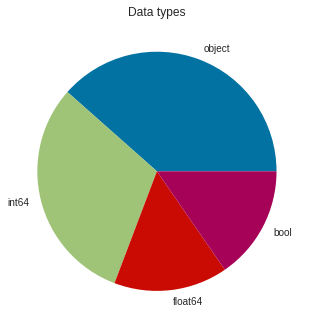

In [59]:
plot_dataframe_structure(df)

#### Dataframe statistics

In [60]:
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


#### Which columns could be categorical ?

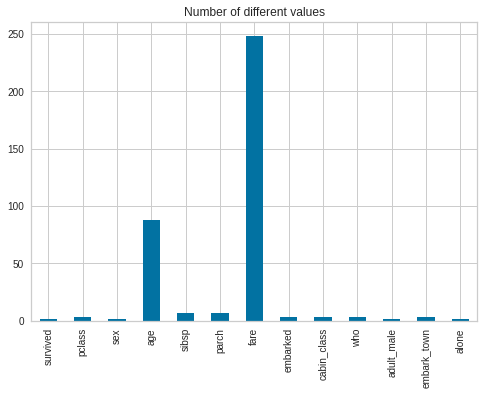

In [61]:
plot_categorical(df)

### Dataset Cleaning

#### Duplicate rows:

In [62]:
duplicates(df)

Number of rows before removing: 891
Number of duplicate rows: 111
Number of rows after removing: 780


,survived,pclass,sex,age,sibsp,parch,fare,embarked,cabin_class,who,adult_male,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,Queenstown,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,Southampton,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,True


#### Drop NaN:

In [63]:
df, drop_cols = drop_na(df, threshold_NaN)

Drop columns containing more than 50.0 % of NaN: []


Final set of dropped columns

In [64]:
dropped_cols = np.unique(np.concatenate((drop_cols, user_drop_cols)))

In [65]:
display(dropped_cols)

array(['alive', 'deck'], dtype=object)

#### Encoding data:

In [66]:
df, encoded_cols = encoding(df, threshold_cat, target_col)

Column  survived  is categorical.
Column  pclass  is categorical.
Encoding object column: sex
Encoding numeric column: age
Encoding numeric column: sibsp
Encoding numeric column: parch
Encoding numeric column: fare
Encoding object column: embarked
Encoding object column: cabin_class
Encoding object column: who
Column  adult_male  is categorical.
Encoding object column: embark_town
Column  alone  is categorical.


#### Imputing NaN using IterativeImputer

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


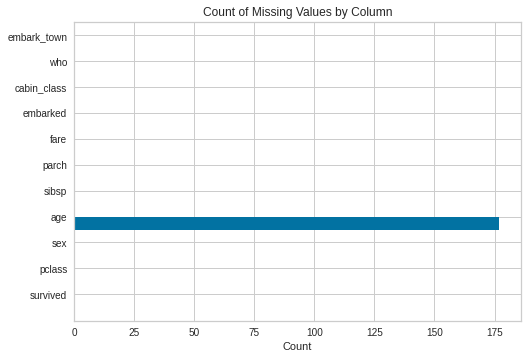

In [67]:
visualizer = MissingValuesBar(features=df.select_dtypes(include=np.number).columns.tolist())
visualizer.fit(df.select_dtypes(include=np.number))
visualizer.show();

##### Imputation

In [68]:
df = imputation(df)

Imputing NaN using IterativeImputer


#### Data compression:

In [69]:
df = downcast_dtypes(df)

Memory usage of dataframe is 0.09MB
Memory usage after optimization is: 0.02MB
Decreased by 74.9%


##### Dataframe structure after compression

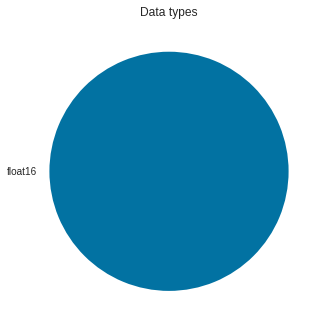

In [70]:
plot_dataframe_structure(df)

#### Outliers:

In [71]:
df = outliers(df, threshold_Z)

Using Z_score,  71  rows will be suppressed.


#### Splitting dataframe in features and targets

In [72]:
y = df[target_col]

In [73]:
X = df.drop(target_col, axis=1)

### Plottings

#### Ranking 

##### Ranking 1D 

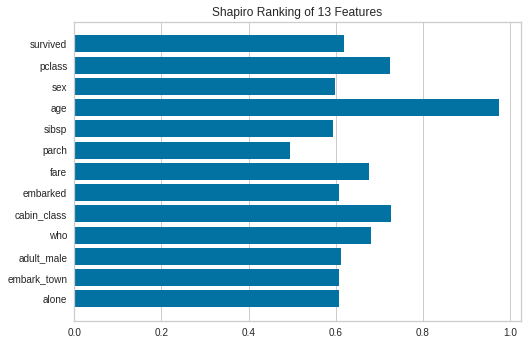

In [74]:
rank1d(df);

##### Ranking 2D 

###### Ranking 2D according to Pearson

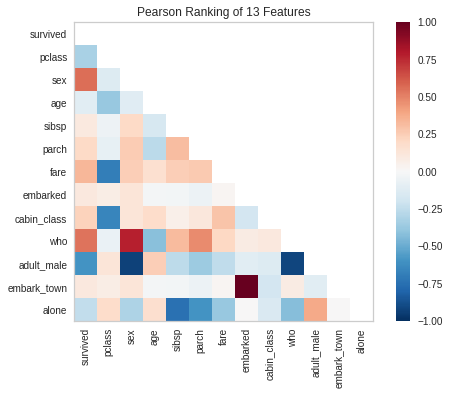

In [75]:
rank2d(df, algorithm='pearson');

###### Ranking 2D based on covariance

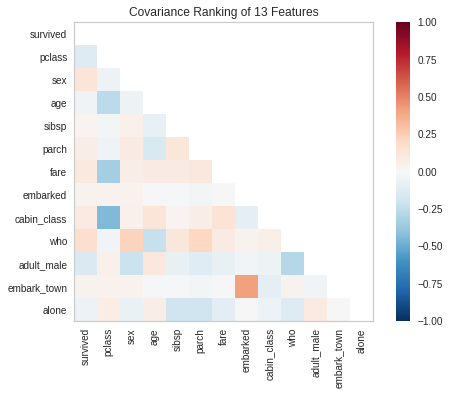

In [76]:
rank2d(df, algorithm='covariance');

###### Ranking 2D according to Spearman

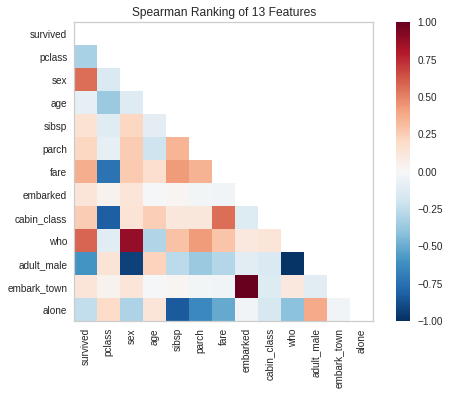

In [77]:
rank2d(df, algorithm='spearman');

###### Ranking 2D according to Kendalltau

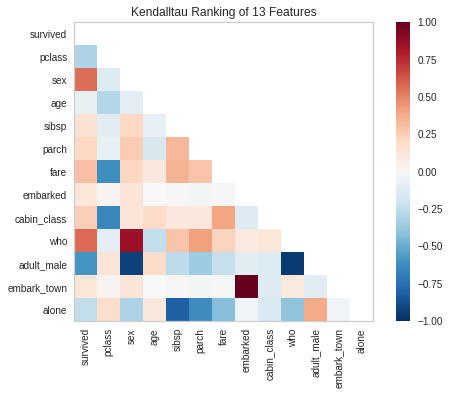

In [78]:
rank2d(df, algorithm='kendalltau');

#### Correlation

##### Correlation with Yellow Bricks

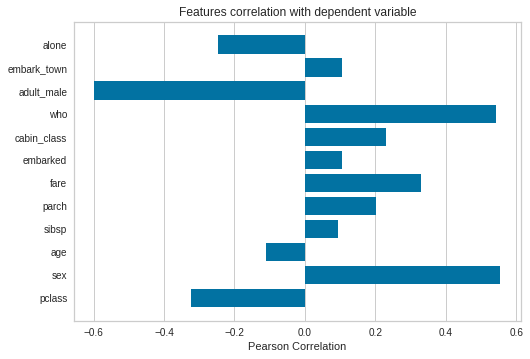

In [79]:
feature_correlation(X, y);

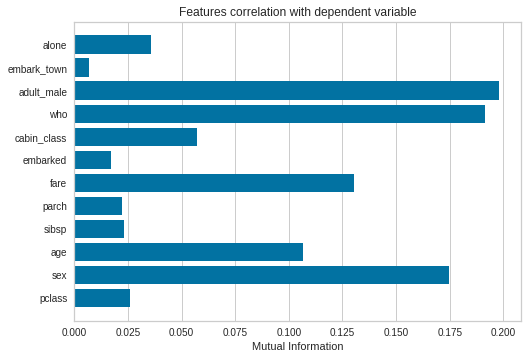

In [80]:
feature_correlation(X, y, method='mutual_info-classification');

#### Feature importance (a priori)

##### According to decision tree

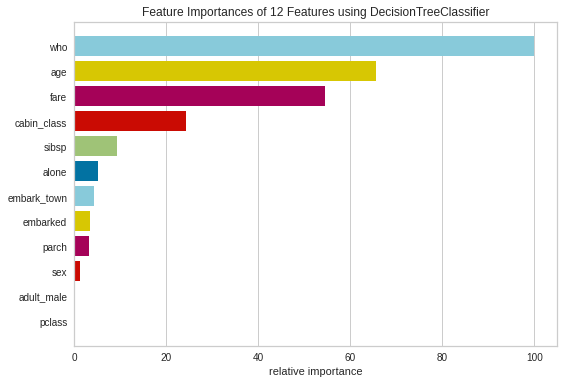

In [81]:
feature_importances(DecisionTreeClassifier(), X, y);

##### According to logistic regression

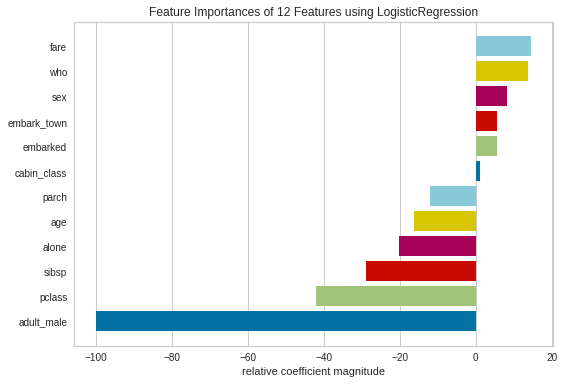

In [82]:
feature_importances(LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5), X, y);

#### PCA

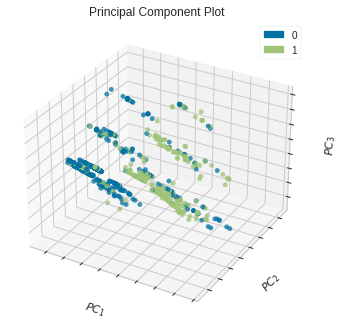

In [83]:
pca_decomposition(X, y.astype(int), projection=3);

#### Class balancing

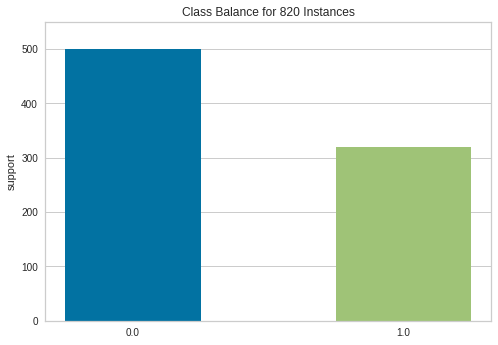

Entropy =  0.9649567669505686


In [84]:
class_balance(y)
print('Entropy = ', shannon_entropy(y))

#### Check columns that should be dropped

In [85]:
print(dropped_cols)

['alive' 'deck']


## Splittings 

In [86]:
df = df_copy

#### Splitting dataframe in features and targets

In [87]:
y = df[target_col]

In [88]:
X = df.drop(target_col, axis=1)

##### Dimensions

In [89]:
nb_features = len(X.columns.tolist())

In [90]:
nb_targets = len(y.unique())

In [91]:
layer_size = nb_features + nb_targets + 2

##### Splitting data in train and test sets 

In [92]:
X_train, X_test, y_train, y_test = split(X, y, test_size=0.33)

##### Encoding

In [93]:
target_encoder = LabelEncoder() 
y_train = pd.Series(target_encoder.fit_transform(y_train)) 
y_test = pd.Series(target_encoder.transform(y_test))

## Modelling

### Model building

#### Pipeline building

##### Select the categorical and numerical columns

In [94]:
cat_selector = make_column_selector(dtype_include=object)

In [95]:
num_selector = make_column_selector(dtype_include=np.number)

##### For models based on tree

In [96]:
cat_tree_processor = make_pipeline(SimpleImputer(strategy='most_frequent'), OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), Decorrelator(threshold_corr))

In [97]:
num_tree_processor = make_pipeline(SimpleImputer(strategy='mean', add_indicator=True), Decorrelator(threshold_corr))

In [98]:
tree_preprocessor = make_column_transformer((num_tree_processor, num_selector), (cat_tree_processor, cat_selector))

##### For models not based on tree

In [99]:
cat_ntree_processor = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(handle_unknown='ignore', sparse=False), Decorrelator(threshold_corr))

In [100]:
num_ntree_processor = make_pipeline(SimpleImputer(strategy='mean', add_indicator=True), StandardScaler(), Decorrelator(threshold_corr))

In [101]:
ntree_preprocessor = make_column_transformer((num_ntree_processor, num_selector), (cat_ntree_processor, cat_selector))

##### Level-0 models

In [102]:
level_0 = [ 
          ('GPCL', make_pipeline(ntree_preprocessor, GaussianProcessClassifier(kernel = ConstantKernel() * DotProduct() + ConstantKernel() + WhiteKernel()))), 
          ('GPCR', make_pipeline(ntree_preprocessor, GaussianProcessClassifier(kernel = ConstantKernel() * RBF() + ConstantKernel() + WhiteKernel()))), 
          ('DTC', make_pipeline(tree_preprocessor, DecisionTreeClassifier(max_depth=5))), 
          ('RFC', make_pipeline(tree_preprocessor, RandomForestClassifier(max_depth=5, n_estimators=10, max_features='auto'))), 
          ('ABC', make_pipeline(tree_preprocessor, AdaBoostClassifier())), 
          ('HGBC', make_pipeline(tree_preprocessor, HistGradientBoostingClassifier(early_stopping=True))), 
          ('LOGR', make_pipeline(ntree_preprocessor, LogisticRegression())), 
          ('LOGRCV', make_pipeline(ntree_preprocessor, LogisticRegressionCV(cv=5))), 
          ('MLPC', make_pipeline(ntree_preprocessor, MLPClassifier(hidden_layer_sizes = (layer_size, layer_size,), max_iter=1000, early_stopping=True))), 
          ('KNC', make_pipeline(ntree_preprocessor, KNeighborsClassifier(n_neighbors=len(y.unique())))), 
          ('GNB', make_pipeline(ntree_preprocessor, GaussianNB())), 
          ]

##### Level-1 model

In [103]:
level_1 = LogisticRegressionCV(cv=5, solver='saga', penalty='elasticnet', l1_ratios=[0.1, 0.5, 0.9])

##### Stacking for classification

In [104]:
model = StackingClassifier(level_0, final_estimator=level_1, n_jobs=-1)

### Model fitting

In [105]:
%%time 
set_config(display='diagram') 
model.fit(X_train, y_train)

CPU times: user 1.79 s, sys: 105 ms, total: 1.89 s
Wall time: 45.8 s


StackingClassifier(estimators=[('GPCL',
                                Pipeline(steps=[('columntransformer',
                                                 ColumnTransformer(transformers=[('pipeline-1',
                                                                                  Pipeline(steps=[('simpleimputer',
                                                                                                   SimpleImputer(add_indicator=True)),
                                                                                                  ('standardscaler',
                                                                                                   StandardScaler()),
                                                                                                  ('decorrelator',
                                                                                                   Decorrelator(threshold=0.95))]),
                                                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f21158da...
                                                                                                   SimpleImputer(strategy='most_frequent')),
                                                                                                  ('onehotencoder',
                                                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                                                 sparse=False)),
                                                                                                  ('decorrelator',
                                                                                                   Decorrelator(threshold=0.95))]),
                                                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f2115944b20>)])),
                                                ('gaussiannb',
                                                 GaussianNB())]))],
                   final_estimator=LogisticRegressionCV(cv=5,
                                                        l1_ratios=[0.1, 0.5,
                                                                   0.9],
                                                        penalty='elasticnet',
                                                        solver='saga'),
                   n_jobs=-1)

### Model evaluation

#### Model scoring

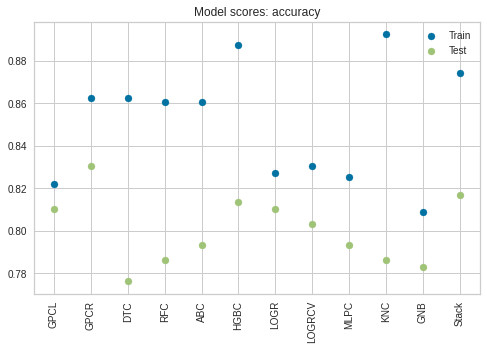

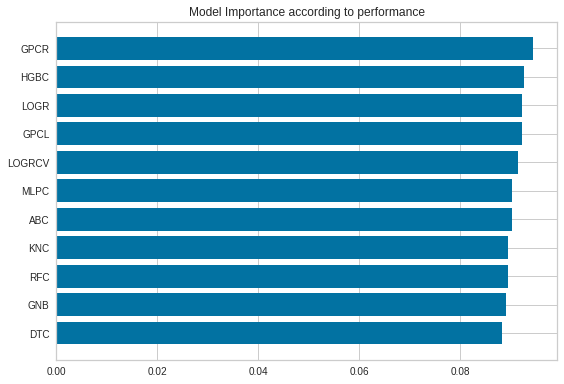

In [106]:
score_stack, mod_imp_score = score_stacking(model, X_train, y_train, X_test, y_test)

#### Model importance

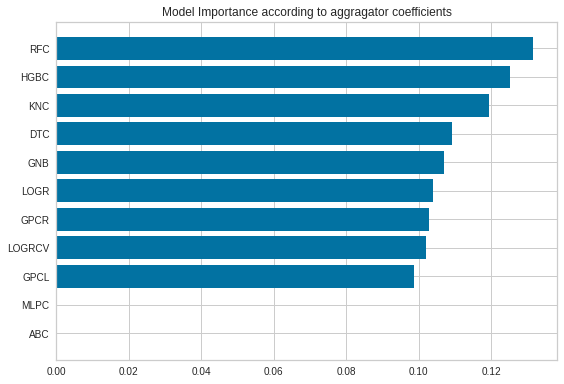

In [107]:
model_imp = plot_model_importance(model)

#### Feature permutation importance (a posteriori)

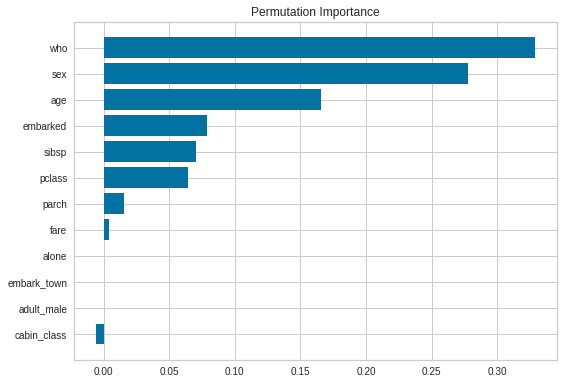

array([['cabin_class', -0.005722460658082981],
       ['adult_male', 0.0],
       ['embark_town', 0.0],
       ['alone', 0.0],
       ['fare', 0.004291845493562212],
       ['parch', 0.015736766809728173],
       ['pclass', 0.06437768240343338],
       ['sibsp', 0.07010014306151635],
       ['embarked', 0.07868383404864082],
       ['age', 0.16595135908440636],
       ['sex', 0.2775393419170244],
       ['who', 0.3290414878397712]], dtype=object)

In [108]:
plot_perm_importance(model, X_test, y_test)

#### Partial Dependence & Individual Conditional Expectation 

##### Features of interest

In [109]:
features_of_interest = []

In [110]:
plot_partial_dependence(model, X_train, features_of_interest)

TypeError: can't multiply sequence by non-int of type 'float'

#### ROC/AUC

In [111]:
classes = y.unique()

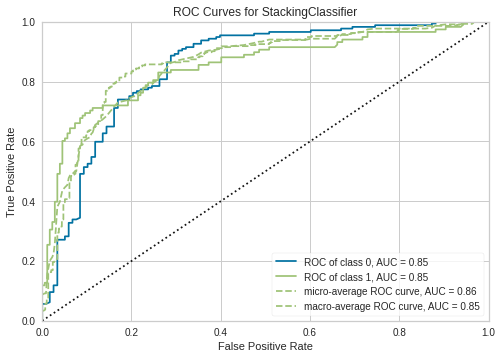

In [112]:
roc_auc(model, X_train, y_train, X_test = X_test, y_test = y_test, classes = classes);

#### Classification report

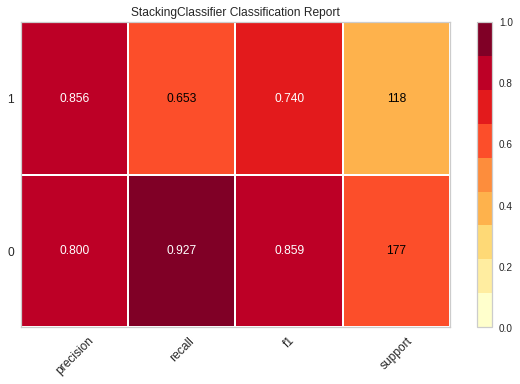

In [113]:
classification_report(model, X_train, y_train, X_test, y_test, classes=classes, support=True);

#### Confusion matrix

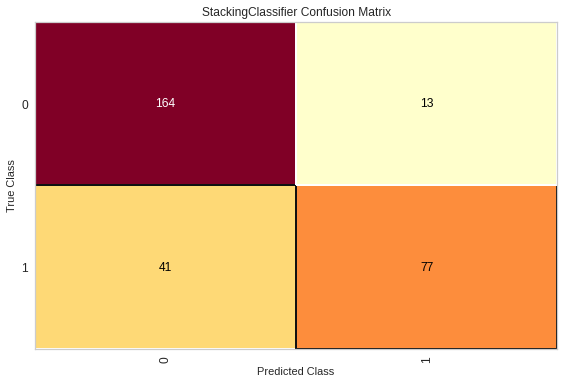

In [114]:
confusion_matrix(model, X_train, y_train, X_test, y_test, classes=classes);

#### Class prediction error

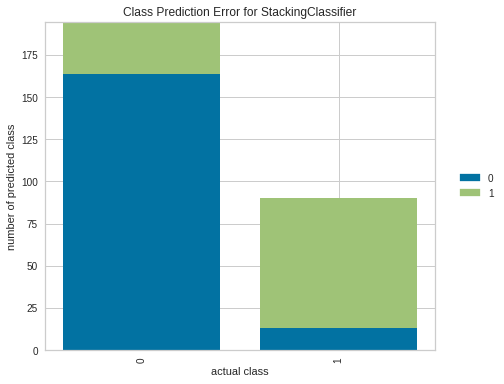

In [115]:
class_prediction_error(model, X_train, y_train, X_test, y_test, classes=classes);

### Final Model

In [116]:
threshold_model = 5

In [117]:
threshold_score = 0.5

##### Filtered Level-0 models

In [118]:
level_0_f = model_filtering(level_0, model_imp, threshold_model, score_stack, threshold_score)

##### Final Level-1 model

In [119]:
level_1 = LogisticRegressionCV(cv=5, solver='saga', penalty='elasticnet', l1_ratios=[0.1, 0.5, 0.9])

##### Build final model

In [120]:
model = StackingClassifier(level_0_f, final_estimator=level_1, n_jobs=-1)

### Final Model fitting

In [121]:
%%time 
set_config(display='diagram') 
model.fit(X_train, y_train)

CPU times: user 365 ms, sys: 15.7 ms, total: 381 ms
Wall time: 2.15 s


StackingClassifier(estimators=[('DTC',
                                Pipeline(steps=[('columntransformer',
                                                 ColumnTransformer(transformers=[('pipeline-1',
                                                                                  Pipeline(steps=[('simpleimputer',
                                                                                                   SimpleImputer(add_indicator=True)),
                                                                                                  ('decorrelator',
                                                                                                   Decorrelator(threshold=0.95))]),
                                                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f21158da040>),
                                                                                 ('pipeline-2',
                                                                                  Pipeline(steps=[(...
                                                                                                   SimpleImputer(strategy='most_frequent')),
                                                                                                  ('onehotencoder',
                                                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                                                 sparse=False)),
                                                                                                  ('decorrelator',
                                                                                                   Decorrelator(threshold=0.95))]),
                                                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f2115944b20>)])),
                                                ('gaussiannb',
                                                 GaussianNB())]))],
                   final_estimator=LogisticRegressionCV(cv=5,
                                                        l1_ratios=[0.1, 0.5,
                                                                   0.9],
                                                        penalty='elasticnet',
                                                        solver='saga'),
                   n_jobs=-1)

#### Final Model scoring

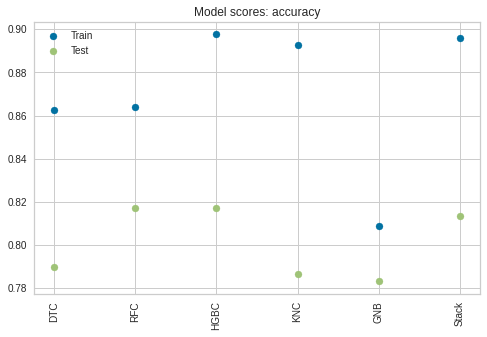

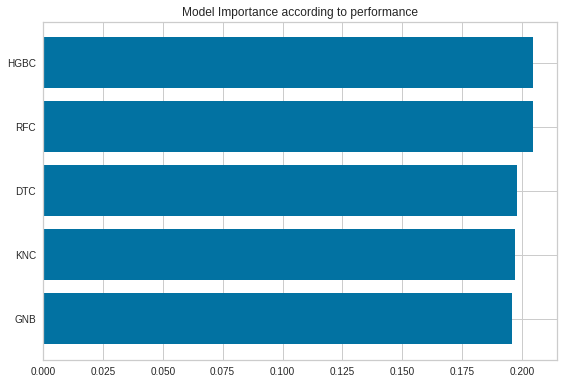

(array([['DTC', 0.8624161073825504, 0.7898305084745763],
        ['RFC', 0.8640939597315436, 0.8169491525423729],
        ['HGBC', 0.8976510067114094, 0.8169491525423729],
        ['KNC', 0.8926174496644296, 0.7864406779661017],
        ['GNB', 0.8087248322147651, 0.7830508474576271],
        ['Stack', 0.8959731543624161, 0.8135593220338984]], dtype=object),
 array([['GNB', 0.19609507640067914],
        ['KNC', 0.19694397283531412],
        ['DTC', 0.19779286926994907],
        ['RFC', 0.20458404074702888],
        ['HGBC', 0.20458404074702888]], dtype=object))

In [122]:
score_stacking(model, X_train, y_train, X_test, y_test)

#### Final feature permutation importance

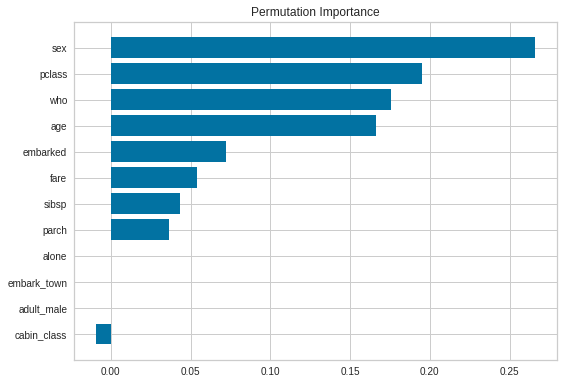

array([['cabin_class', -0.009174311926605302],
       ['adult_male', 0.0],
       ['embark_town', 0.0],
       ['alone', 0.0],
       ['parch', 0.03669724770642203],
       ['sibsp', 0.043250327653997445],
       ['fare', 0.05373525557011805],
       ['embarked', 0.07208387942332896],
       ['age', 0.1664482306684141],
       ['who', 0.17562254259501955],
       ['pclass', 0.19528178243774563],
       ['sex', 0.2660550458715595]], dtype=object)

In [123]:
plot_perm_importance(model, X_test, y_test)

#### Final ROC/AUC

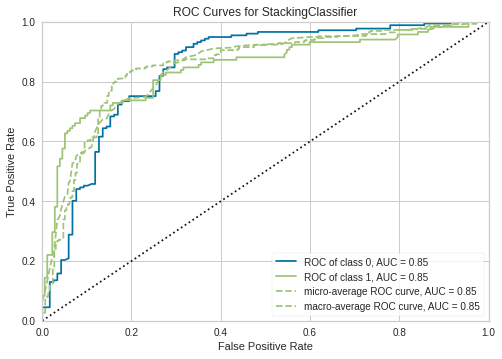

In [124]:
classes = y.unique() 
roc_auc(model, X_train, y_train, X_test = X_test, y_test = y_test, classes = classes);

#### Final Classification report

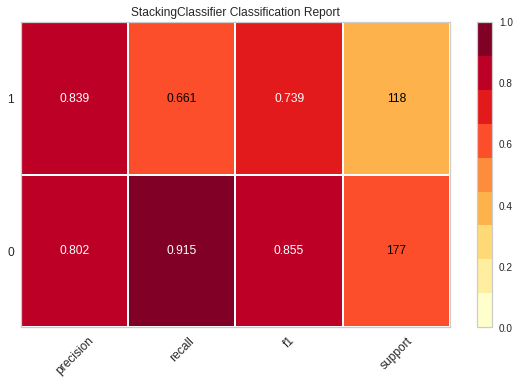

In [125]:
classification_report(model, X_train, y_train, X_test, y_test, classes=classes, support=True);

#### Final Confusion matrix

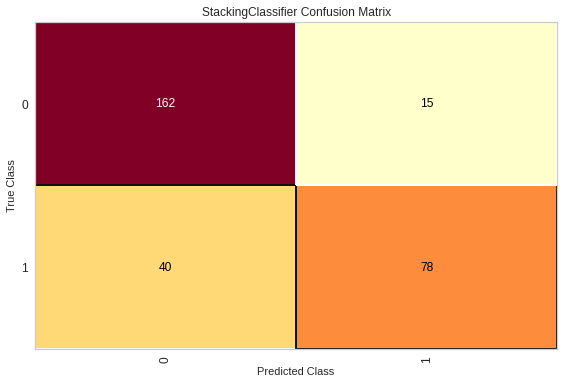

In [126]:
confusion_matrix(model, X_train, y_train, X_test, y_test, classes=classes);

#### Final Class prediction error

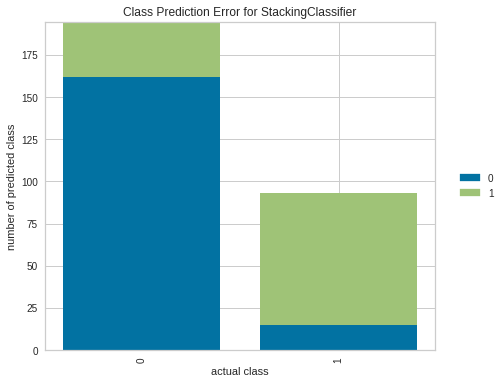

In [127]:
class_prediction_error(model, X_train, y_train, X_test, y_test, classes=classes);

## Deployment

### Save your model

In [128]:
model_name = 'model.sav' 
dump(model, model_name)

['model.sav']

### Generate your server

In [129]:
fastapi_server(model, 'model.sav', X, y)

### Start your server

In [130]:
run server.py

INFO:     Started server process [17968]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)
INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [17968]


### Test your API at http://127.0.0.1:8000/docs